# I03 Probability Based Learning

## Task 1: Understand the data

### Installing and importing libraries

In [1]:
!pip install eli5==0.13.0
!pip install wordcloud==1.8.2.2
!pip install lime==0.2.0.1
!pip install factor_analyzer==0.4.1
!pip install plotnine==0.10.1
!pip install shap==0.41.0
!pip install rfpimp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 KB 33.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.1/133.1 KB 24.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 KB 9.4 MB/s eta 0:00:00
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=13b8a4ce972a9597fdff254d94a2684d8bbd15f7c6c9e883551a609250ec3f5c
  Stored in directory: /root/.cache/pip/wheels/7b/26/a5/8460416695a992a2966b41caa5338e5e7fcea98c9d032d055c
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Not uninstalling jinja2 at /shared-libs/python3.9/py-core/lib/python3.9/site-packages, outside environment /root/venv
    Can't uninstall 'Jinja2'. No files were found to uninstall.
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/root/venv/bin/python -m pip in

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from matplotlib.pyplot import show
from matplotlib.colors import ListedColormap
from plotnine import *
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.utils.multiclass import unique_labels
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from factor_analyzer import FactorAnalyzer
from sklearn.preprocessing import LabelEncoder as le
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,accuracy_score,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_classification
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from rfpimp import permutation_importances
import lime
from lime.lime_tabular import LimeTabularExplainer
import eli5
from eli5.sklearn import PermutationImportance
import shap
from shap import TreeExplainer,KernelExplainer,LinearExplainer
shap.initjs()

2023-03-11 23:35:09.127888: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-11 23:35:09.275257: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-11 23:35:09.275285: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-11 23:35:09.307607: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-03-11 23:35:11.022052: W tensorflow/stream_executor/pla

### Importing dataset

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/meetgojiya98/MBA6693_Business_Analytics_II/main/datasets/hospital.csv', sep=',')
df.head()

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Hospital Ownership,Emergency Services,...,SAFETY_HAI_3_SIR_Score,SAFETY_HAI_4_SIR_Score,SAFETY_HAI_5_SIR_Score,SAFETY_HAI_6_SIR_Score,MED_OP_10_Score,MED_OP_11_Score,MED_OP_13_Score,MED_OP_14_Score,MED_OP_8_Score,MED_OP_9_Score
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Government,Yes,...,-1.87000,-0.000000,-0.422000,-0.787,-6.4,-0.900000,-7.100000,-2.400000,-38.100000,-6.9
1,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,Government,Yes,...,-0.38600,-0.871177,-1.388000,-0.405,-13.3,-10.200000,-5.300000,-4.000000,-42.800000,-5.1
2,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,LAUDERDALE,2567688400,Government,Yes,...,-0.31000,-0.871177,-1.261000,-0.513,-11.8,-4.600000,-0.000000,-4.600000,-45.600000,-9.1
3,10007,MIZELL MEMORIAL HOSPITAL,702 N MAIN ST,OPP,AL,36467,COVINGTON,3344933541,Voluntary,Yes,...,-0.96398,-0.871177,-0.987212,-0.000,-24.3,-6.100000,-4.716942,-2.964405,-39.964766,-20.7
4,10008,CRENSHAW COMMUNITY HOSPITAL,101 HOSPITAL CIRCLE,LUVERNE,AL,36049,CRENSHAW,3343353374,Others,Yes,...,-0.96398,-0.871177,-0.987212,-0.585,-3.6,-2.936245,-4.716942,-0.600000,-39.964766,-8.2


### Shape of data

In [4]:
df.shape

(3057, 94)

### Checking data info

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3057 entries, 0 to 3056
Data columns (total 94 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Provider ID                                           3057 non-null   int64  
 1   Hospital Name                                         3057 non-null   object 
 2   Address                                               3057 non-null   object 
 3   City                                                  3057 non-null   object 
 4   State                                                 3057 non-null   object 
 5   ZIP Code                                              3057 non-null   int64  
 6   County Name                                           3057 non-null   object 
 7   Phone Number                                          3057 non-null   int64  
 8   Hospital Ownership                                    3057

### Describing the data

In [6]:
df.describe()

,Provider ID,ZIP Code,Phone Number,Hospital overall rating,Mortality national comparison,Safety of care national comparison,Readmission national comparison,Patient experience national comparison,Effectiveness of care national comparison,Timeliness of care national comparison,...,SAFETY_HAI_3_SIR_Score,SAFETY_HAI_4_SIR_Score,SAFETY_HAI_5_SIR_Score,SAFETY_HAI_6_SIR_Score,MED_OP_10_Score,MED_OP_11_Score,MED_OP_13_Score,MED_OP_14_Score,MED_OP_8_Score,MED_OP_9_Score
count,3057.000000,3057.000000,3.057000e+03,3057.000000,3057.000000,3057.000000,3057.000000,3057.000000,3057.000000,3057.000000,...,3057.000000,3057.000000,3057.000000,3057.000000,3057.000000,3057.000000,3057.000000,3057.000000,3057.000000,3057.000000
mean,261817.891397,51757.296696,5.913678e+09,3.025842,1.018973,1.042852,0.981681,0.937848,1.192673,0.976447,...,-0.963980,-0.871177,-0.986907,-0.842215,-8.697796,-2.937054,-4.716686,-2.965375,-39.967077,-9.146034
std,159800.930561,27935.174759,2.383292e+09,0.869600,0.492383,0.693884,0.731887,0.799253,0.647062,0.750720,...,0.644294,0.449185,0.669359,0.485605,9.039672,5.102808,1.618808,1.422932,4.684942,4.802502
min,10001.000000,613.000000,9.369338e+08,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-5.216000,-4.819000,-7.017000,-3.741000,-76.200000,-56.300000,-13.600000,-14.000000,-63.400000,-64.300000
25%,110089.000000,30223.000000,3.607345e+09,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,-1.065000,-0.871177,-0.987212,-1.110000,-9.900000,-2.936245,-5.200000,-3.200000,-39.964766,-10.100000
50%,260022.000000,48617.000000,6.072744e+09,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,-0.963980,-0.871177,-0.987212,-0.841970,-6.100000,-1.100000,-4.716942,-2.964405,-39.964766,-8.900000
75%,390142.000000,76017.000000,8.059556e+09,4.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,-0.630000,-0.871177,-0.712000,-0.554000,-3.400000,-0.200000,-4.000000,-2.200000,-39.964766,-6.600000
max,670098.000000,99801.000000,9.898943e+09,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-14.900000,-0.000000


### Listing all columns 

In [7]:
cols = list(df.columns)
len(cols), cols

(94,
 ['Provider ID',
  'Hospital Name',
  'Address',
  'City',
  'State',
  'ZIP Code',
  'County Name',
  'Phone Number',
  'Hospital Ownership',
  'Emergency Services',
  'Hospital overall rating',
  'Mortality national comparison',
  'Safety of care national comparison',
  'Readmission national comparison',
  'Patient experience national comparison',
  'Effectiveness of care national comparison',
  'Timeliness of care national comparison',
  'Efficient use of medical imaging national comparison',
  'MORT_30_AMI_Score',
  'MORT_30_CABG_Score',
  'MORT_30_COPD_Score',
  'MORT_30_HF_Score',
  'MORT_30_PN_Score',
  'MORT_30_STK_Score',
  'rating_group',
  'READM_30_AMI_Score',
  'READM_30_CABG_Score',
  'READM_30_COPD_Score',
  'READM_30_HF_Score',
  'READM_30_HIP_KNEE_Score',
  'READM_30_HOSP_WIDE_Score',
  'READM_30_PN_Score',
  'READM_30_STK_Score',
  'TIME_OP_21_Score',
  'TIME_OP_5_Score',
  'EFF_EDV_Score',
  'EFF_ED_1b_Score',
  'EFF_ED_2b_Score',
  'EFF_IMM_2_Score',
  'EFF_IMM

### Checking for null values

In [8]:
def check_missing(df):
    count_missing = df.isnull().sum().sort_values(ascending=False)
    percent_missing = round((df.isnull().sum() * 100 / len(df)), 2).sort_values(ascending=False)
    missing_value_df = pd.DataFrame({'count_missing': count_missing,
                                     'percent_missing': percent_missing})
    return missing_value_df

check_missing(df)

,count_missing,percent_missing
Provider ID,0,0.0
EXP_H_COMP_1_STAR_RATING_Score,0,0.0
EXP_H_RECMND_STAR_RATING_Score,0,0.0
EXP_H_QUIET_STAR_RATING_Score,0,0.0
EXP_H_HSP_RATING_STAR_RATING_Score,0,0.0
...,...,...
READM_30_HIP_KNEE_Score,0,0.0
READM_30_HF_Score,0,0.0
READM_30_COPD_Score,0,0.0
READM_30_CABG_Score,0,0.0


### No. of unique categories in columns

In [9]:
def unique_count(df):
    data_type = df.dtypes
    unique_count = df.nunique()
    
    unique_count_df = pd.DataFrame({'data_type': data_type,
                                 'unique_count': unique_count})
    return unique_count_df

unique_count(df).transpose()

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Hospital Ownership,Emergency Services,...,SAFETY_HAI_3_SIR_Score,SAFETY_HAI_4_SIR_Score,SAFETY_HAI_5_SIR_Score,SAFETY_HAI_6_SIR_Score,MED_OP_10_Score,MED_OP_11_Score,MED_OP_13_Score,MED_OP_14_Score,MED_OP_8_Score,MED_OP_9_Score
data_type,int64,object,object,object,object,int64,object,int64,object,object,...,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
unique_count,3057,2941,3047,1874,51,2823,1038,3052,3,2,...,1182,552,1092,1290,368,226,108,97,292,244


### Average rating across all hospitals

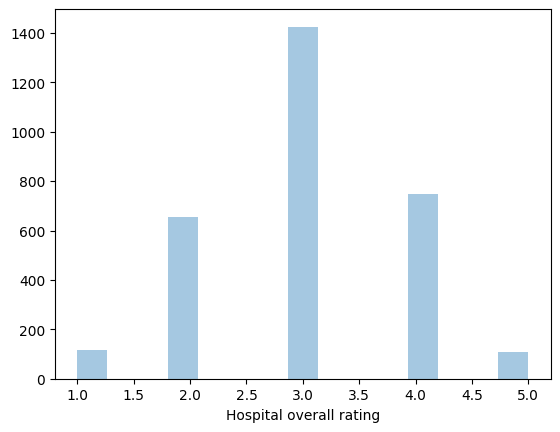

count    3057.000000
mean        3.025842
std         0.869600
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: Hospital overall rating, dtype: float64

In [10]:
df["Hospital overall rating"] = df["Hospital overall rating"].astype(int)
sns.distplot(df["Hospital overall rating"], kde=False)
plt.show()

df["Hospital overall rating"].describe()

Average rating across all hospitals is 3.02

### Ownership of hospitals

In [11]:
df.groupby("Hospital Ownership").agg({"Hospital overall rating": ["mean", "count", "median", "std"]})

Hospital overall rating                       
                                      mean count median       std
Hospital Ownership                                               
Government                        2.878351   485      3  0.859827
Others                            2.959459   666      3  0.922489
Voluntary                         3.086569  1906      3  0.847016

Voluntary owned hospitals have the highest overall ratings among others.

### Mortality comparision

In [12]:
df.groupby("Mortality national comparison").agg({"Hospital overall rating": ["mean", "count", "median", "std"]})

Hospital overall rating                       
                                                 mean count median       std
Mortality national comparison                                               
0                                            2.482456   342      2  0.776100
1                                            3.060475  2315      3  0.841227
2                                            3.290000   400      3  0.918154

### Safety of care

In [13]:
df.groupby("Safety of care national comparison").agg({"Hospital overall rating": ["mean", "count", "median", "std"]})

Hospital overall rating               \
                                                      mean count median   
Safety of care national comparison                                        
0                                                 2.362556   673      2   
1                                                 3.098734  1580      3   
2                                                 3.437811   804      3   

                                              
                                         std  
Safety of care national comparison            
0                                   0.814248  
1                                   0.739117  
2                                   0.836504

### Readmission

In [14]:
df.groupby("Readmission national comparison").agg({"Hospital overall rating": ["mean", "count", "median", "std"]})

Hospital overall rating                       
                                                   mean count median       std
Readmission national comparison                                               
0                                              2.375443   847      2  0.767706
1                                              3.112051  1419      3  0.742230
2                                              3.567636   791      4  0.737882

### Patient experience

In [15]:
df.groupby("Patient experience national comparison").agg({"Hospital overall rating": ["mean", "count", "median", "std"]})

Hospital overall rating               \
                                                          mean count median   
Patient experience national comparison                                        
0                                                     2.416899  1077      2   
1                                                     3.086917  1093      3   
2                                                     3.689966   887      4   

                                                  
                                             std  
Patient experience national comparison            
0                                       0.746623  
1                                       0.650966  
2                                       0.715627

### Effectiveness of care

In [16]:
df.groupby("Effectiveness of care national comparison").agg({"Hospital overall rating": ["mean", "count", "median", "std"]})

Hospital overall rating        \
                                                             mean count   
Effectiveness of care national comparison                                 
0                                                        2.721393   402   
1                                                        3.068510  1664   
2                                                        3.077699   991   

                                                            
                                          median       std  
Effectiveness of care national comparison                   
0                                              3  0.768449  
1                                              3  0.876701  
2                                              3  0.872137

### Timeliness of care

In [17]:
df.groupby("Timeliness of care national comparison").agg({"Hospital overall rating": ["mean", "count", "median", "std"]})

Hospital overall rating               \
                                                          mean count median   
Timeliness of care national comparison                                        
0                                                     2.618040   898      3   
1                                                     3.181545  1333      3   
2                                                     3.217918   826      3   

                                                  
                                             std  
Timeliness of care national comparison            
0                                       0.898399  
1                                       0.849866  
2                                       0.707342

### Efficient use of medical imaging

In [18]:
df.groupby("Efficient use of medical imaging national comparison").agg({"Hospital overall rating": ["mean", "count", "median", "std"]})

Hospital overall rating  \
                                                                      mean   
Efficient use of medical imaging national compa...                           
0                                                                 2.858824   
1                                                                 3.048770   
2                                                                 3.033426   

                                                                           
                                                   count median       std  
Efficient use of medical imaging national compa...                         
0                                                    340      3  0.822299  
1                                                   2358      3  0.868872  
2                                                    359      3  0.902509

###  Plotting the percentages for the National comparison ratings for different measures

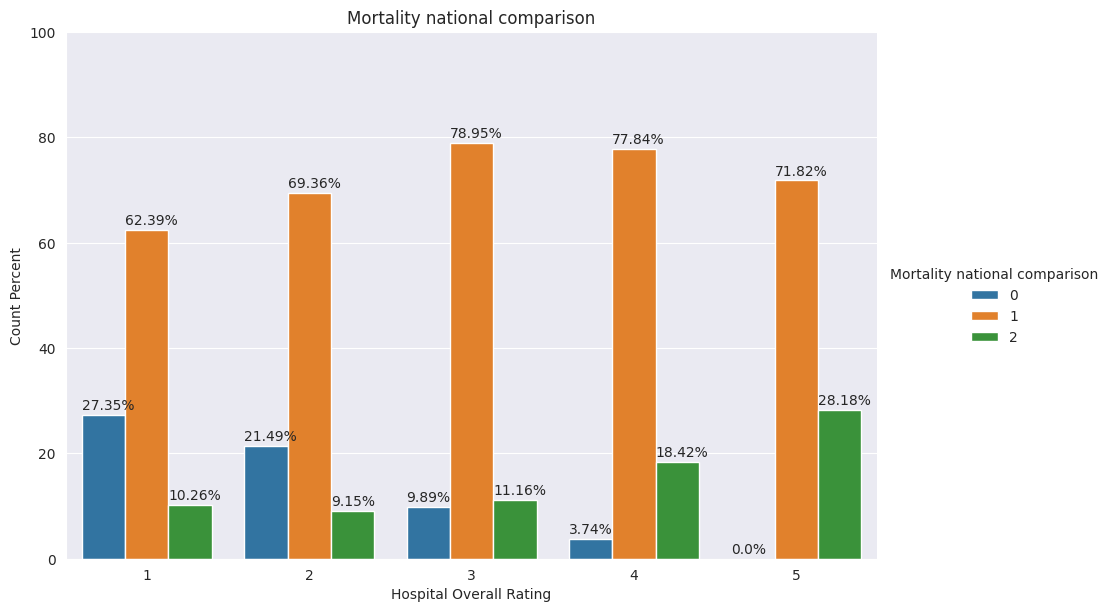

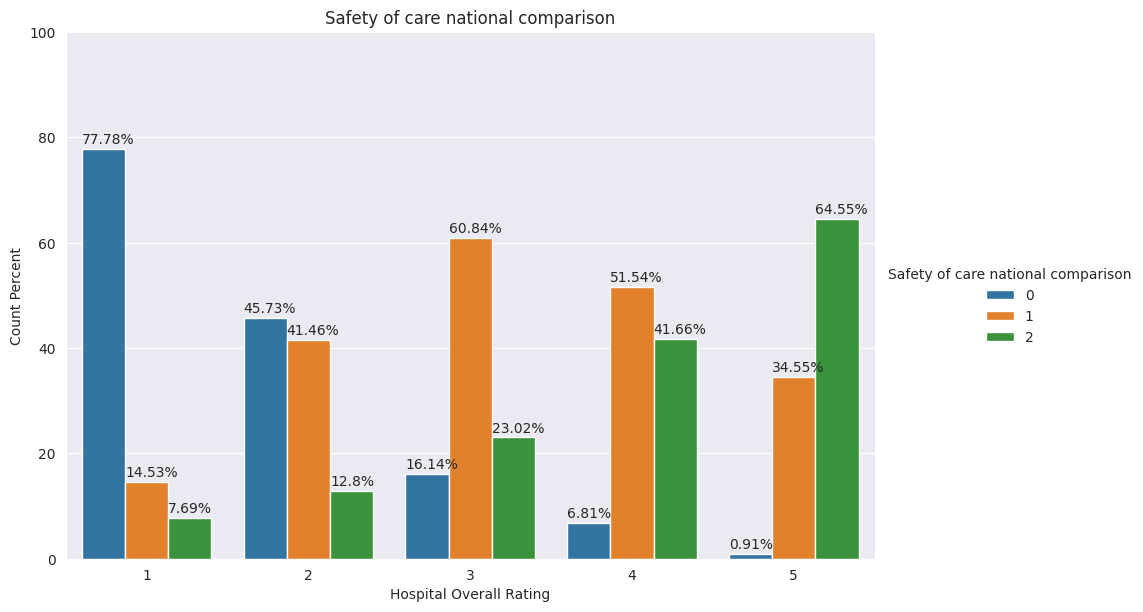

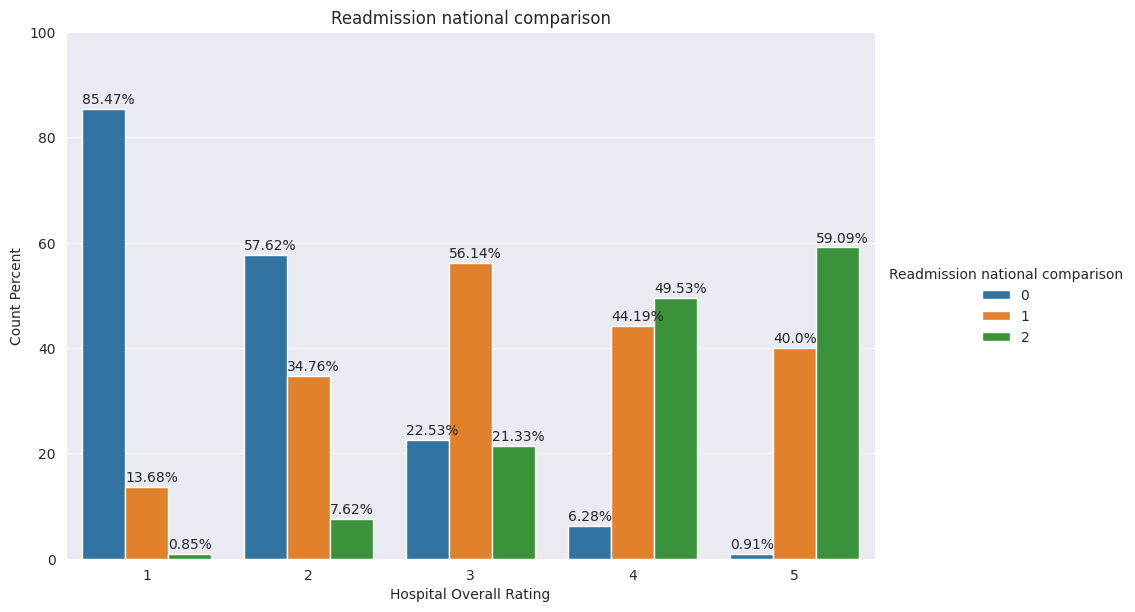

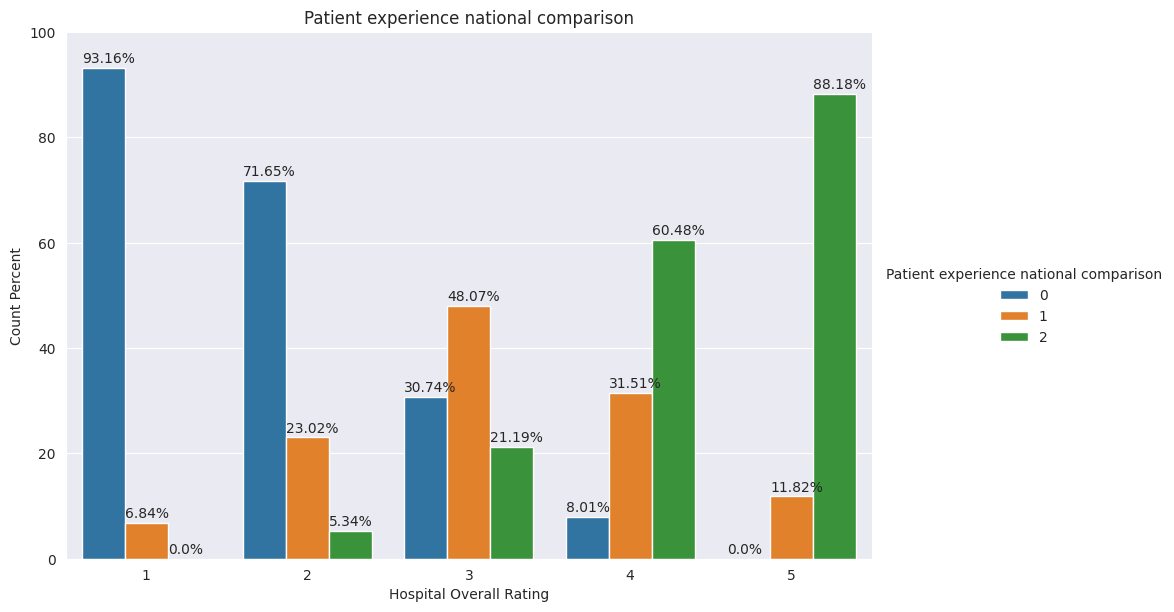

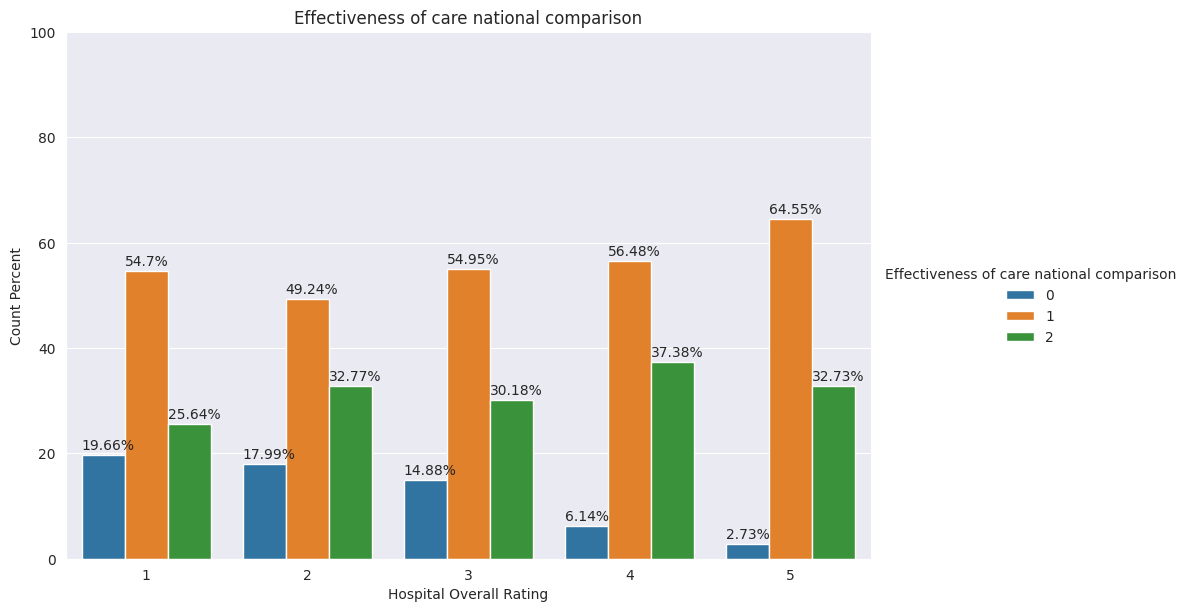

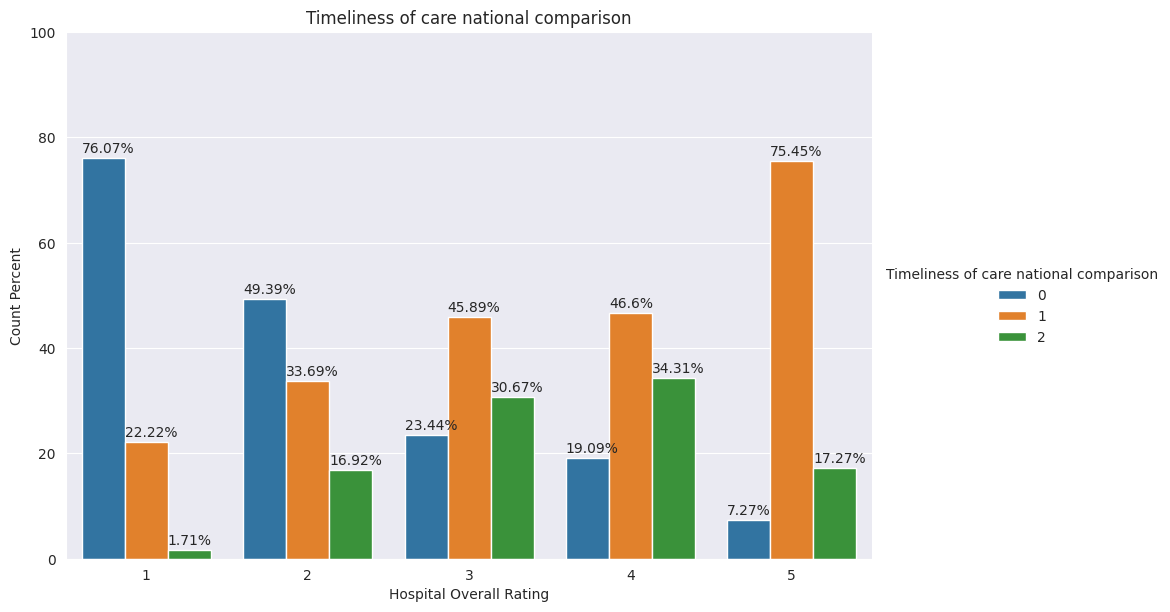

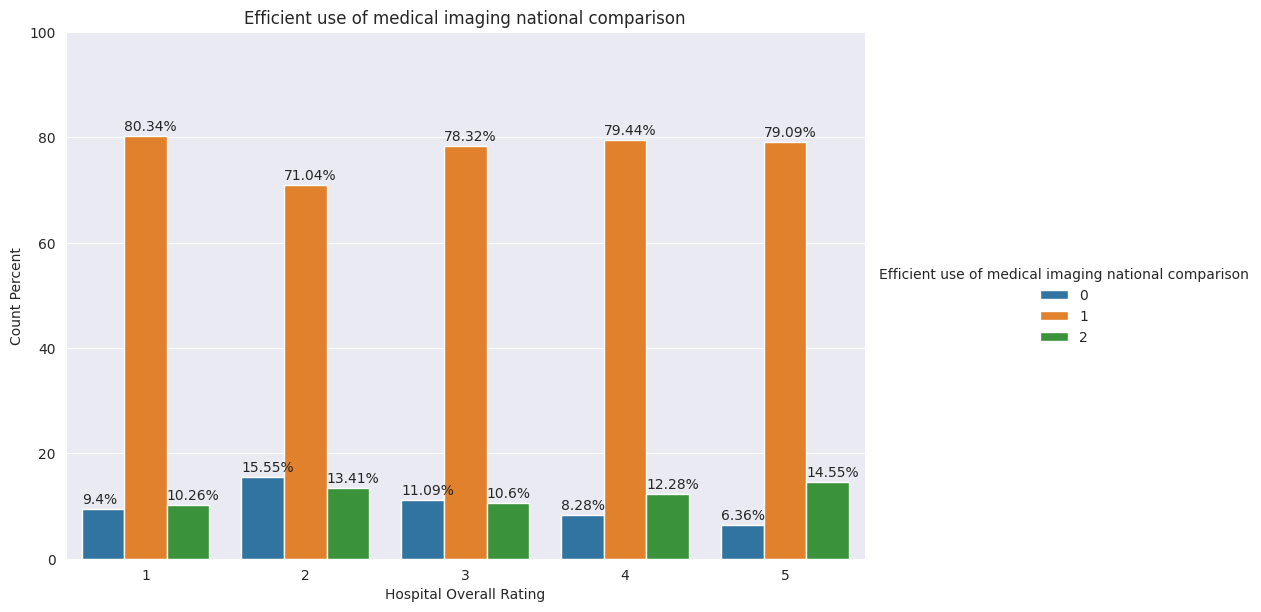

In [19]:
comparison_filter = df.filter(regex='comparison').columns
df_ = df.loc[df['Hospital overall rating'] != 'Not Available']

sns.set_style('darkgrid')
for k in comparison_filter:
    x,y = 'Hospital overall rating', k
    df1 = df_.groupby(x)[y].value_counts(normalize=True)
    df1 = df1.mul(100) 
    df1 = df1.rename('percent').reset_index()

    g = sns.catplot(x=x, y='percent', hue=y, kind='bar', data=df1, height=6, aspect=1.5, dodge=True)
    g.ax.set_ylim(0,100)
    g.ax.set(xlabel = 'Hospital Overall Rating', ylabel = 'Count Percent')
    g.ax.set_title(k)  
    for p in g.ax.patches:
        txt_x = np.nan_to_num(p.get_x())
        y_val = np.nan_to_num(p.get_height())
        txt_y = y_val + 1
        txt = str(y_val.round(2)) + '%'
        g.ax.text(txt_x,txt_y,txt)

Inference from above plotted charts:

The assessment of healthcare facilities is vital in providing quality care to patients. In this regard, various measures are taken into account to rate hospitals, including Mortality Measures, Safety Measures, Readmission Score, Patient Experience, Effectiveness Measures, Timeliness Measures, and Efficient use of imaging measures.

In terms of Mortality Measures, it is noteworthy that 29% of all 5-star hospitals have scores greater than the National Average. Meanwhile, 39% of these hospitals have no available comparison. This implies that when present, 5-star hospitals exhibit higher Mortality Measure scores.

Similarly, Safety Measures play a crucial role in determining a hospital's star rating. Approximately 78% of 1-star hospitals have scores below the National Average, while 64% of 5-star hospitals score higher. Hence, a higher Safety score corresponds to a better star rating.

Furthermore, Readmission Score also contributes significantly to the overall star rating. It is evident that 1 and 2-star hospitals have a high percentage of scores lower than the National Average, while 4 and 5-star hospitals have higher scores. This clearly demonstrates that higher Readmission measures lead to better star ratings.

Patient Experience is another vital aspect of hospital assessment. Astonishingly, 89% of 5-star hospitals and 65% of 4-star hospitals have scores higher than the National Average, and none of them scored lower. This suggests that Patient Experience scores have a significant impact on the overall star rating.

Finally, while Effectiveness Measures, Timeliness Measures, and Efficient use of imaging measures are essential components of hospital assessment, their contribution to the overall star rating is relatively lower, as expected from their 4% weightage. Hospitals' scores for these measures are generally similar to the National Average, with minimal differences observed between different star ratings.

### Plotting the no. of hospitals by state

In [20]:
states = pd.value_counts(df['State'])
states = pd.DataFrame(states)
states = states.reset_index()

states.columns = ['State', 'Number of Hospitals']

Text(0.5, 1.0, 'Number of Hospitals per State')

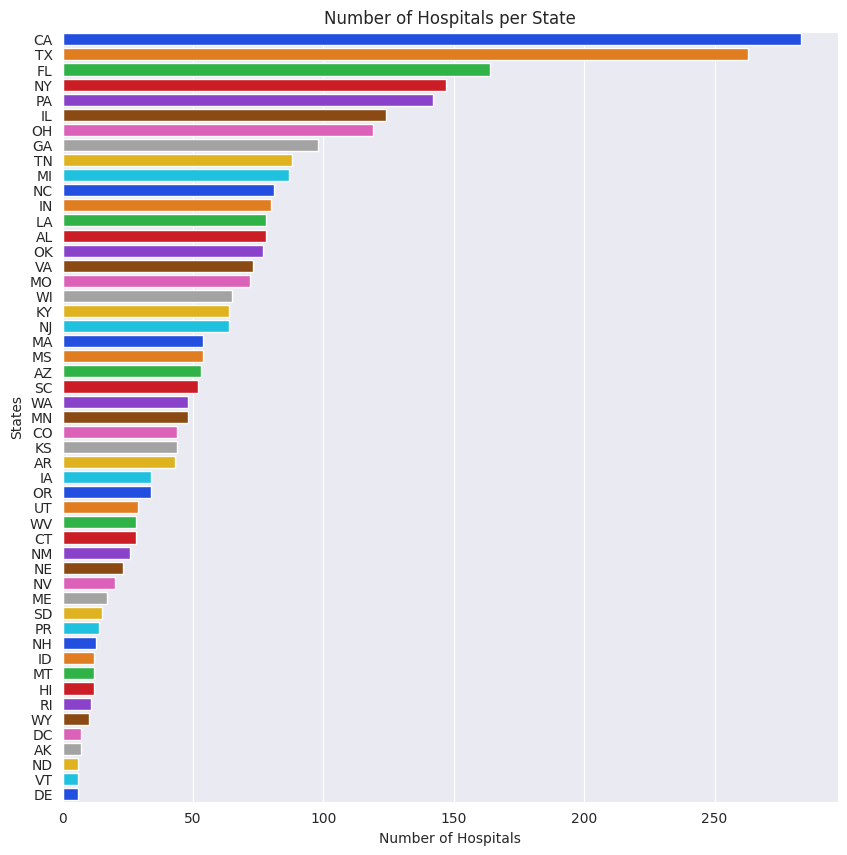

In [21]:
dims = (10, 10)
fig, ax = plt.subplots(figsize=dims)
colors = sns.color_palette('bright')
ax = sns.barplot(x = 'Number of Hospitals', y = 'State', data = states, palette=colors)
ax.set(xlabel = 'Number of Hospitals', ylabel = 'States')
ax.set_title('Number of Hospitals per State')

### Plotting the no. of hospitals by hospital owner

In [22]:
own = pd.value_counts(df['Hospital Ownership'])
own = pd.DataFrame(own)
own = own.reset_index()
own.columns = ['Hospital Ownership', 'Number of Hospitals']

Text(0.5, 1.0, 'Count of the different Types of Hospital Ownership')

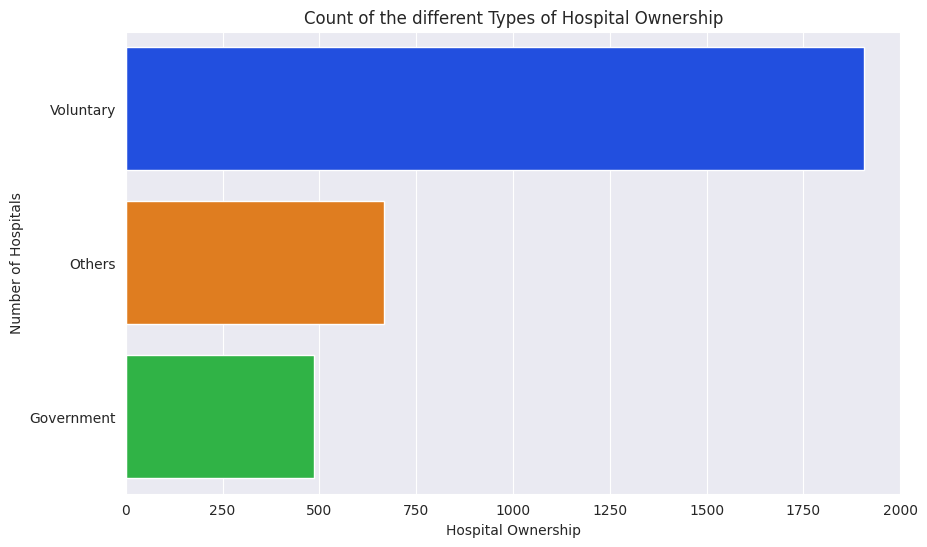

In [23]:
dims = (10,6)
fig, ax = plt.subplots(figsize=dims)
ax = sns.barplot(y = 'Hospital Ownership', x= 'Number of Hospitals', data = own, palette=colors)
ax.set(xlabel = 'Hospital Ownership', ylabel = 'Number of Hospitals')
ax.set_title('Count of the different Types of Hospital Ownership')

### Plotting the Distribution of Hospital Rating

In [24]:
df['Hospital overall rating'].unique()

array([3, 2, 4, 5, 1])

In [25]:
rate = df.drop(df[df['Hospital overall rating']=='Not Available'].index)
rate['Hospital overall rating'].unique()

array([3, 2, 4, 5, 1])

In [26]:
rate = pd.value_counts(rate['Hospital overall rating'])
rate = pd.DataFrame(rate)
rate = rate.reset_index()
rate.columns = ['Hospital Rating', 'Number of Hospitals']

[Text(0.5, 0, 'Hospital Rating'), Text(0, 0.5, 'Number of Hospitals')]

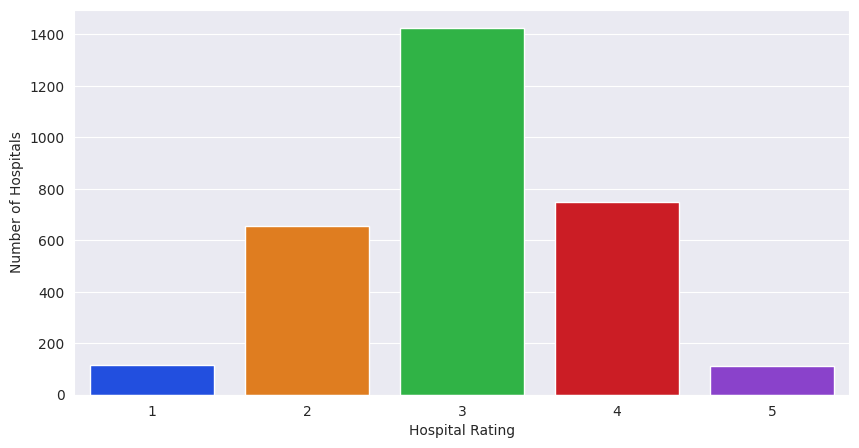

In [27]:
dims = (10, 5)
fig, ax = plt.subplots(figsize=dims)
ax = sns.barplot(x = 'Hospital Rating', y = 'Number of Hospitals', palette=colors,data = rate)
ax.set(xlabel = 'Hospital Rating', ylabel = 'Number of Hospitals')

### Plotting heatmap

In [28]:
cor = df.corr().abs()

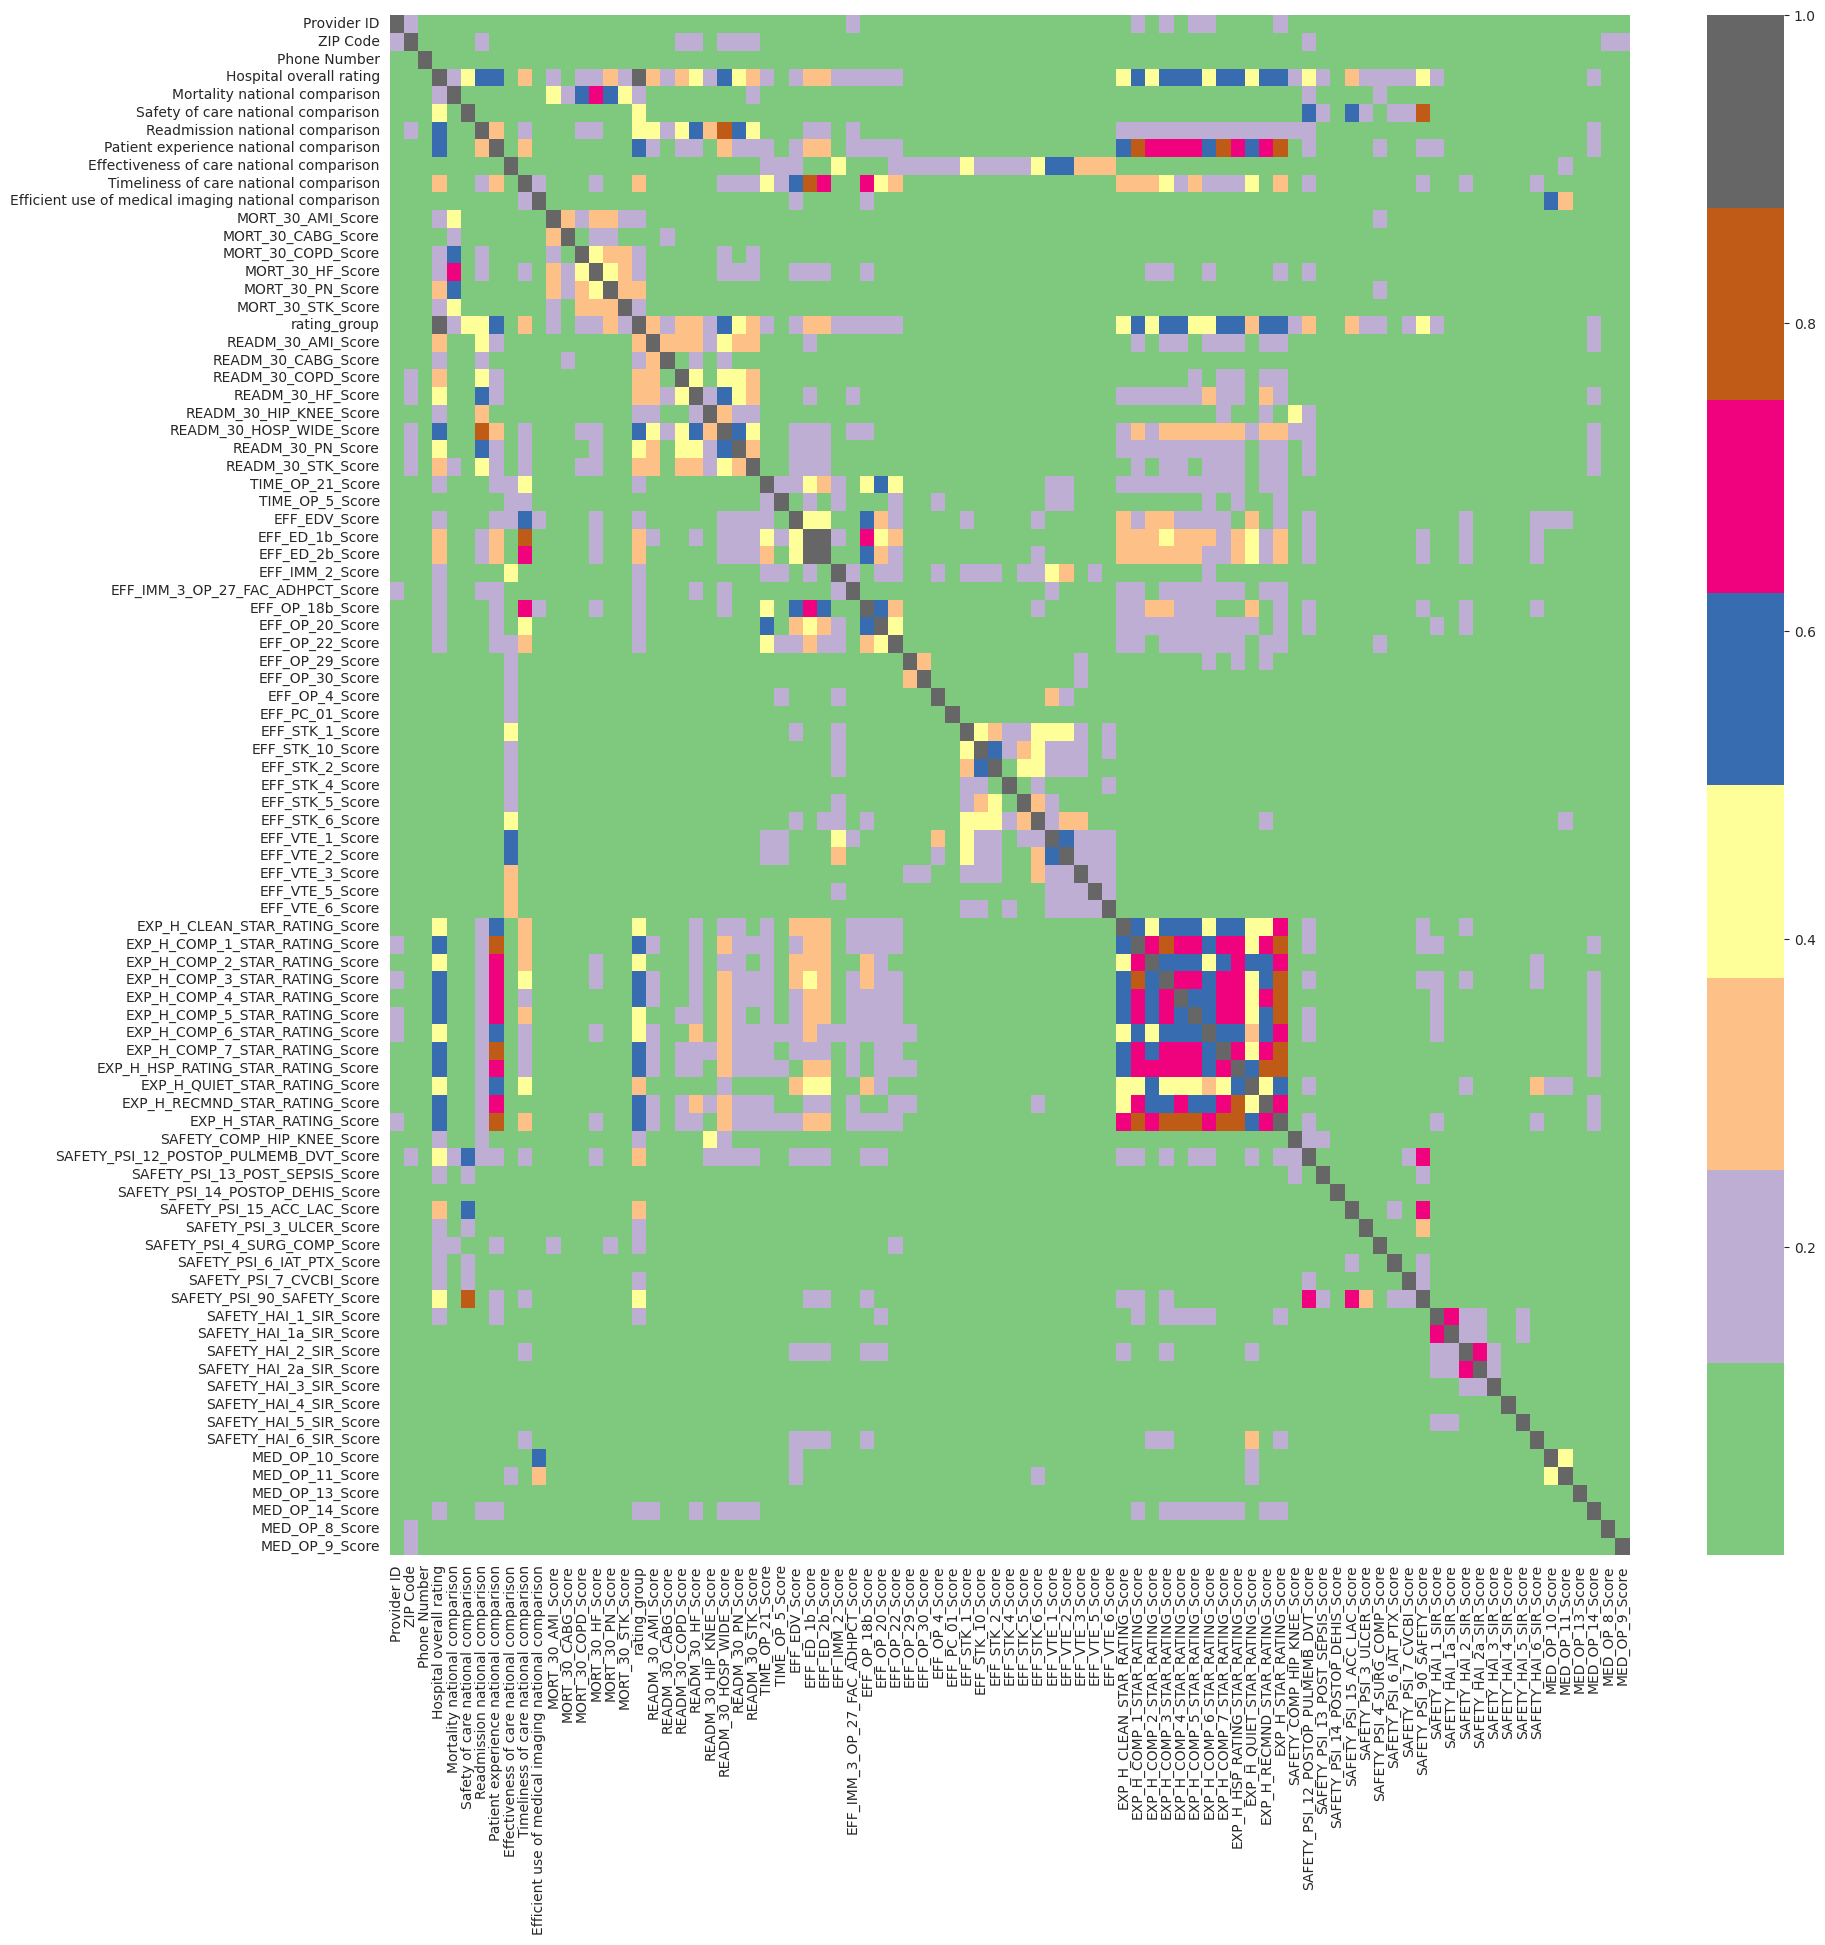

In [29]:
plt.figure(figsize=(20,20))
sns.heatmap(cor, cmap="Accent")
plt.show()

## Task 2: Build machine learning models

### Dropping demographic features

In [30]:
df = df.drop(['Provider ID', 'Hospital Name', 'Address', 'City', 'State', 'ZIP Code', 'County Name', 'Phone Number', 'Hospital Ownership'], axis=1)

### Creating dummy variables for the categorical variable 'Energency Services'

In [31]:
dummies = pd.get_dummies(df['Emergency Services'], prefix='emergency')
df = pd.concat([df, dummies], axis=1)
df = df.drop(['Emergency Services'], axis=1)

### Converting ratings as following: 1,2,3 as 0 and 4,5 as 1

In [32]:
df['Hospital overall rating'] = df['Hospital overall rating'].replace([1, 2, 3], 0)
df['Hospital overall rating'] = df['Hospital overall rating'].replace([4, 5], 1)

### Train-test and validation split

In [33]:
X = df.drop("Hospital overall rating",axis=1)
y = df["Hospital overall rating"]

In [34]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, train_size=0.7,  random_state=0)
X_train.shape,X_test.shape

((2139, 85), (918, 85))

### Building a variety of models

In [35]:
%%time
ML_models = {}
model_index = ['LR','RF','NN', 'GRB', 'DT','KN']
model_sklearn = [LogisticRegression(solver='liblinear',random_state=0),
                 RandomForestClassifier(n_estimators=100,random_state=0),
                 MLPClassifier([100]*5,early_stopping=True,learning_rate='adaptive',random_state=0),
                 GradientBoostingClassifier(n_estimators = 50, max_depth = 2, random_state = 0),
                 DecisionTreeClassifier(random_state = 0),
                 KNeighborsClassifier(n_neighbors=5)]
                
    
model_summary = []
model_summary1 = []

for name,model in zip(model_index,model_sklearn):
    ML_models[name] = model.fit(X_train,y_train)
    preds = model.predict(X_test)
    model_summary.append([name,f1_score(y_test,preds,average='weighted'),accuracy_score(y_test,preds)])
    model_summary1.append([name,confusion_matrix(y_test,preds)])
print(ML_models)

{'LR': LogisticRegression(random_state=0, solver='liblinear'), 'RF': RandomForestClassifier(random_state=0), 'NN': MLPClassifier(early_stopping=True, hidden_layer_sizes=[100, 100, 100, 100, 100],
              learning_rate='adaptive', random_state=0), 'GRB': GradientBoostingClassifier(max_depth=2, n_estimators=50, random_state=0), 'DT': DecisionTreeClassifier(random_state=0), 'KN': KNeighborsClassifier()}
CPU times: user 11.1 s, sys: 7.64 s, total: 18.8 s
Wall time: 18.9 s


In [36]:
model_summary = pd.DataFrame(model_summary,columns=['Name','F1_score','Accuracy'])
model_summary = model_summary.reset_index()
display(model_summary)

,index,Name,F1_score,Accuracy
0,0,LR,1.000000,1.000000
1,1,RF,1.000000,1.000000
2,2,NN,0.937801,0.937908
3,3,GRB,1.000000,1.000000
4,4,DT,1.000000,1.000000
5,5,KN,0.687712,0.698257


### Comparing Accuracy and F1 Score of the models

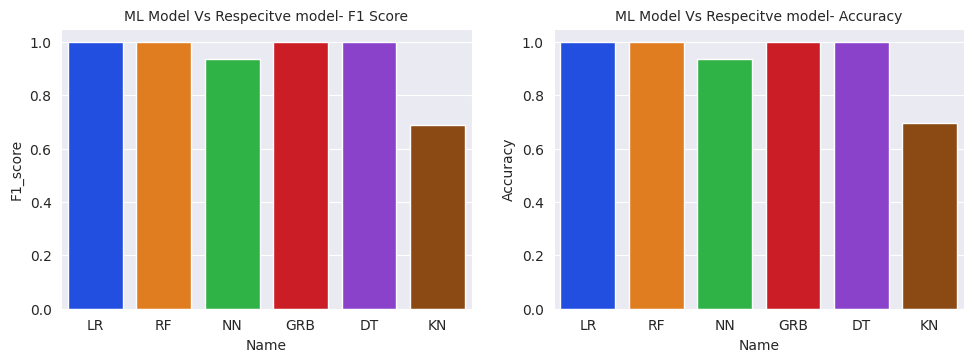

In [37]:
plt.rcParams['figure.figsize']=(18,8)
plt.subplot(231)
g=sns.barplot(data=model_summary, x="Name", y="F1_score", palette=colors)
plt.title('ML Model Vs Respecitve model- F1 Score', fontsize=10)

plt.subplot(232)
g=sns.barplot(data=model_summary, x="Name", y="Accuracy", palette=colors)
plt.title('ML Model Vs Respecitve model- Accuracy', fontsize=10)

plt.show()

### Ranking importance of features

Top 10 features are: 
rating_group
READM_30_HOSP_WIDE_Score
Patient experience national comparison
EXP_H_COMP_7_STAR_RATING_Score
SAFETY_PSI_90_SAFETY_Score
EXP_H_STAR_RATING_Score
Readmission national comparison
EXP_H_COMP_1_STAR_RATING_Score
EXP_H_HSP_RATING_STAR_RATING_Score
EXP_H_RECMND_STAR_RATING_Score


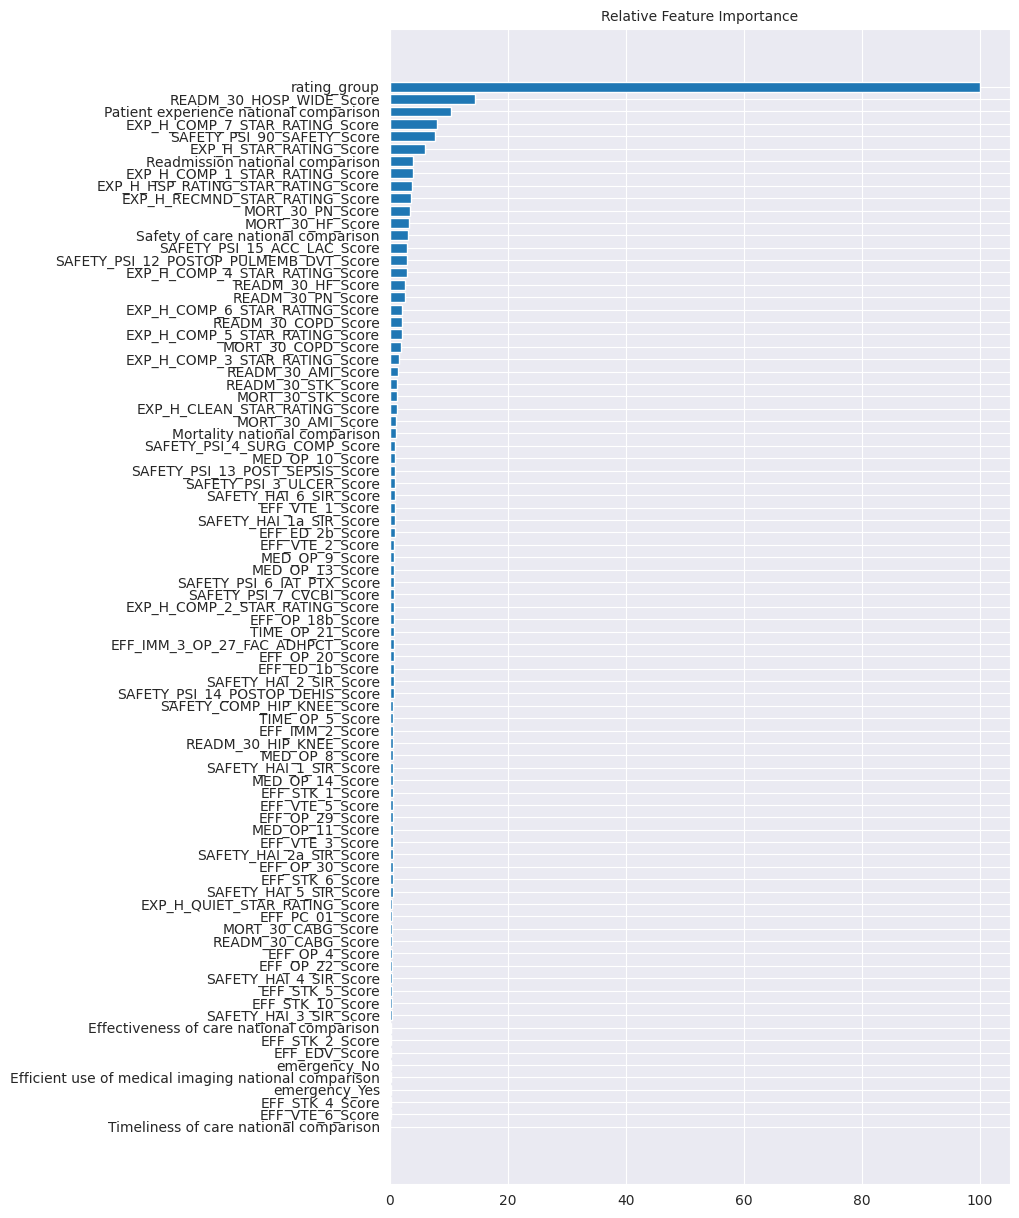

In [38]:
importances = ML_models['RF'].feature_importances_

# make importance relative to the max importance
feature_importance = 100.0 * (importances / importances.max())
sorted_idx = np.argsort(feature_importance)
feature_names = list(X_train.columns.values)
feature_names_sort = [feature_names[indice] for indice in sorted_idx]
pos = np.arange(sorted_idx.shape[0]) + .5
print('Top 10 features are: ')
for feature in feature_names_sort[::-1][:10]:
    print(feature)

# plot the result
plt.figure(figsize=(8, 15))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, feature_names_sort)
plt.title('Relative Feature Importance', fontsize=10)
plt.show()

Top 10 features are: 
rating_group
emergency_Yes
EFF_OP_20_Score
TIME_OP_5_Score
EFF_EDV_Score
EFF_ED_1b_Score
EFF_ED_2b_Score
EFF_IMM_2_Score
EFF_IMM_3_OP_27_FAC_ADHPCT_Score
EFF_OP_18b_Score


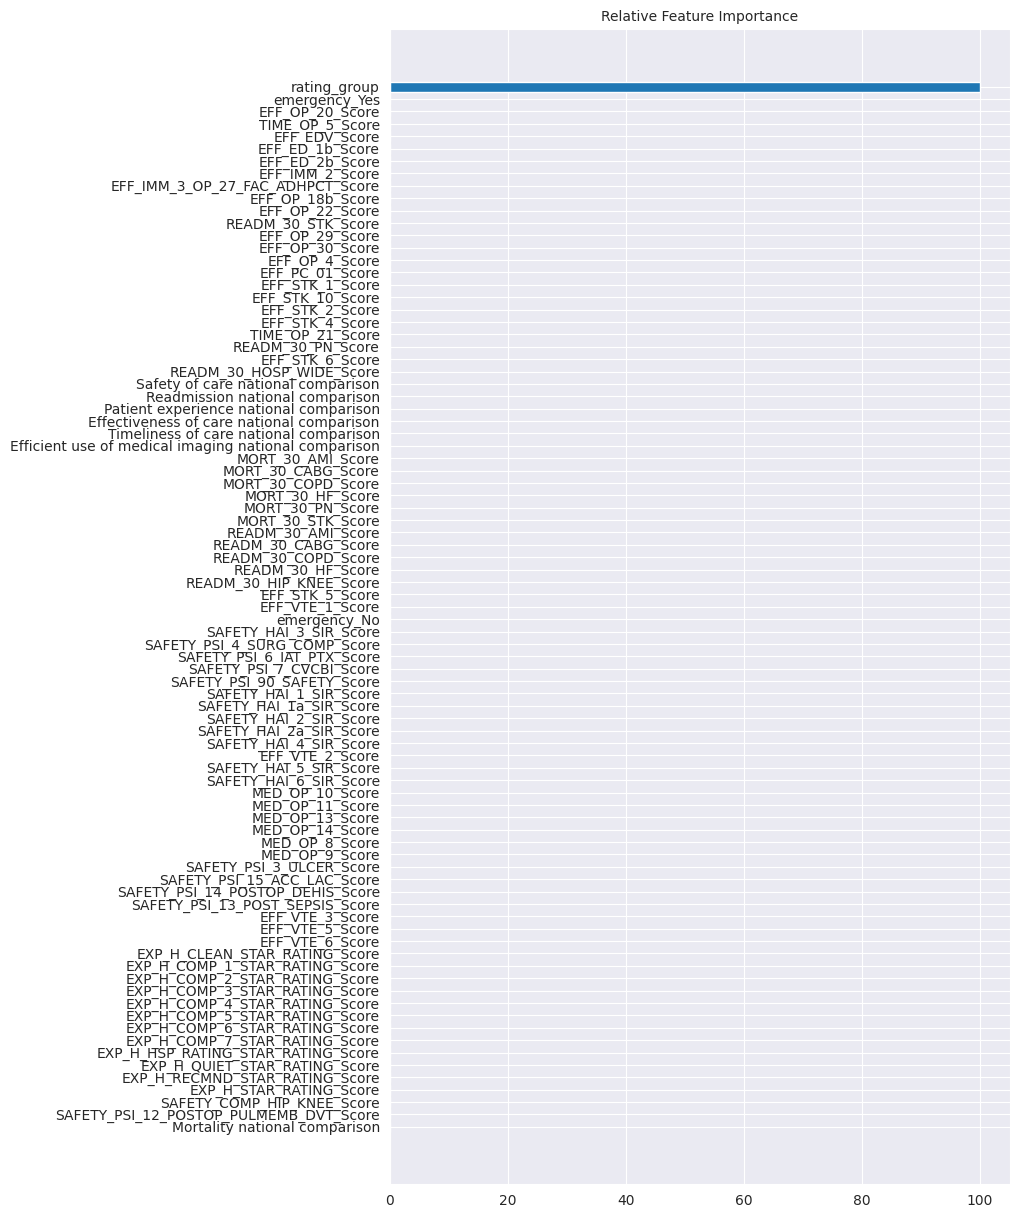

In [39]:
importances = ML_models['DT'].feature_importances_

# make importance relative to the max importance
feature_importance = 100.0 * (importances / importances.max())
sorted_idx = np.argsort(feature_importance)
feature_names = list(X_train.columns.values)
feature_names_sort = [feature_names[indice] for indice in sorted_idx]
pos = np.arange(sorted_idx.shape[0]) + .5
print('Top 10 features are: ')
for feature in feature_names_sort[::-1][:10]:
    print(feature)

# plot the result
plt.figure(figsize=(8, 15))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, feature_names_sort)
plt.title('Relative Feature Importance', fontsize=10)
plt.show()

Top 10 features are: 
rating_group
TIME_OP_21_Score
SAFETY_HAI_1_SIR_Score
SAFETY_HAI_6_SIR_Score
EXP_H_COMP_7_STAR_RATING_Score
SAFETY_PSI_12_POSTOP_PULMEMB_DVT_Score
SAFETY_HAI_2_SIR_Score
EFF_ED_1b_Score
SAFETY_HAI_2a_SIR_Score
SAFETY_PSI_15_ACC_LAC_Score


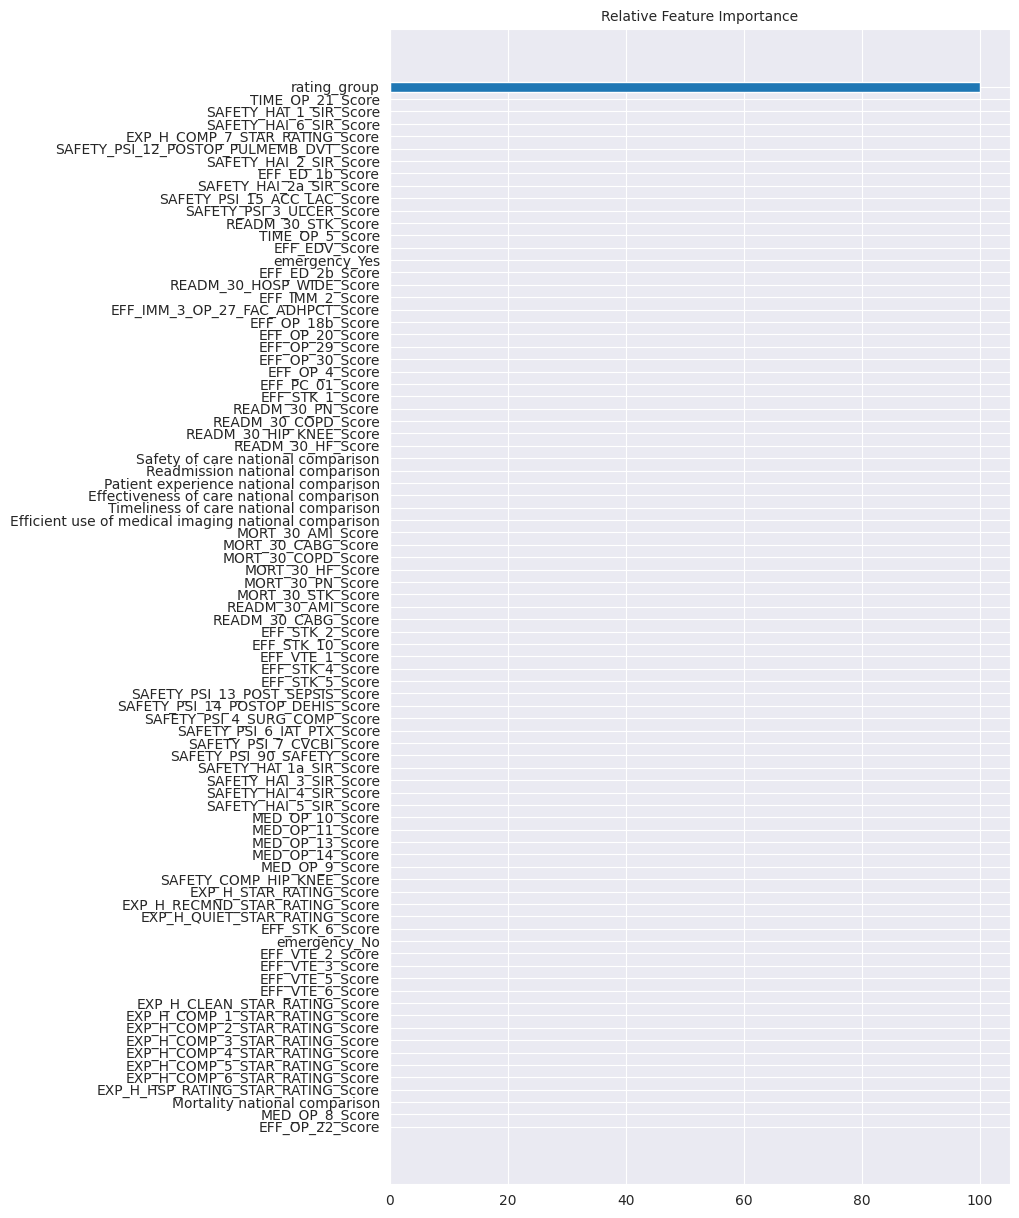

In [40]:
importances = ML_models['GRB'].feature_importances_

# make importance relative to the max importance
feature_importance = 100.0 * (importances / importances.max())
sorted_idx = np.argsort(feature_importance)
feature_names = list(X_train.columns.values)
feature_names_sort = [feature_names[indice] for indice in sorted_idx]
pos = np.arange(sorted_idx.shape[0]) + .5
print('Top 10 features are: ')
for feature in feature_names_sort[::-1][:10]:
    print(feature)

# plot the result
plt.figure(figsize=(8, 15))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, feature_names_sort)
plt.title('Relative Feature Importance', fontsize=10)
plt.show()

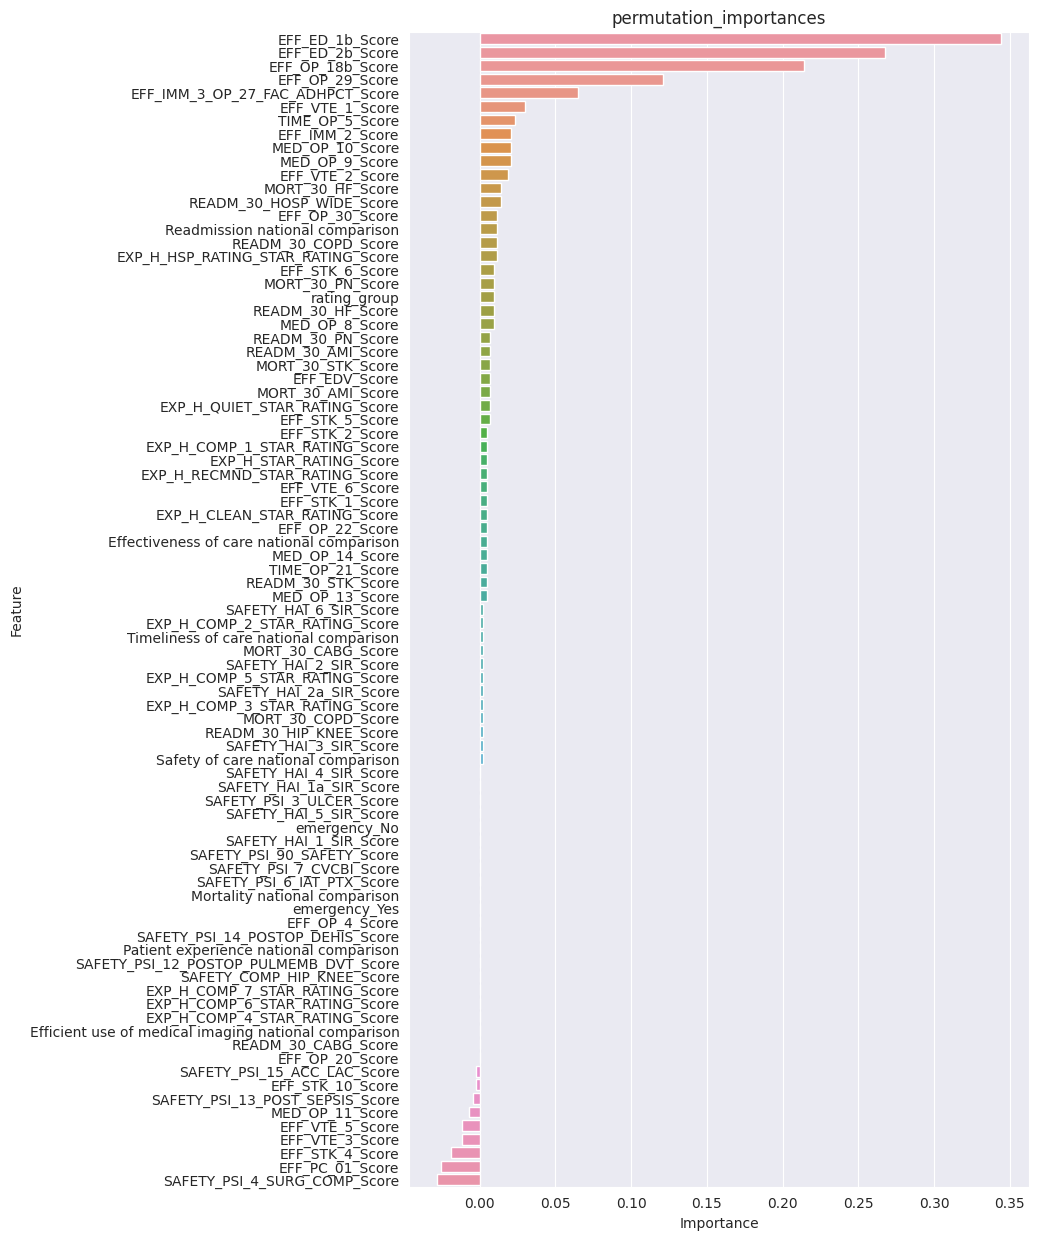

In [41]:
def r2(model, X_train, y_train):
    return r2_score(y_train, model.predict(X_train))

perm_imp_rfpimp = permutation_importances(model, X_train, y_train, r2).reset_index()

plt.figure(figsize=(8, 15))
g=sns.barplot(data=perm_imp_rfpimp, y="Feature", x="Importance")
plt.title('permutation_importances')
plt.show()

#### Gaussian Naive Bayes Classifier

In [42]:
clf = GaussianNB()
clf.fit(X_train,y_train)

GaussianNB()

In [43]:
y_pred = clf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       655
           1       1.00      0.93      0.96       263

    accuracy                           0.98       918
   macro avg       0.99      0.96      0.97       918
weighted avg       0.98      0.98      0.98       918



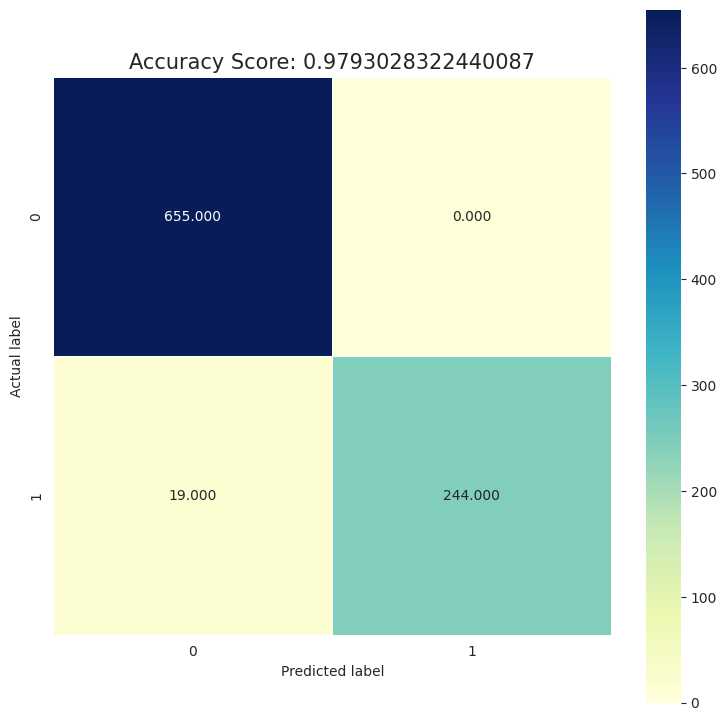

In [44]:
y_score_acc = accuracy_score(y_test, y_pred)
cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'YlGnBu');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(y_score_acc)
plt.title(all_sample_title, size = 15);

## Task 3: Providing Recommendations

### Hospital Rating Predictor

In [50]:
not_rated_df = pd.read_csv('https://raw.githubusercontent.com/meetgojiya98/MBA6693_Business_Analytics_II/main/datasets/hospital_not_yet_rated.csv', sep=',')
not_rated_df

,Provider ID,Hospital Ownership,Emergency Services,Mortality national comparison,Safety of care national comparison,Readmission national comparison,Patient experience national comparison,Effectiveness of care national comparison,Timeliness of care national comparison,Efficient use of medical imaging national comparison,...,SAFETY_HAI_3_SIR_Score,SAFETY_HAI_4_SIR_Score,SAFETY_HAI_5_SIR_Score,SAFETY_HAI_6_SIR_Score,MED_OP_10_Score,MED_OP_11_Score,MED_OP_13_Score,MED_OP_14_Score,MED_OP_8_Score,MED_OP_9_Score
0,520139,Voluntary,Yes,1,1,2,2,2,2,1,...,-0.37100,-1.278000,0.000000,-0.56600,-3.100000,-0.500000,-6.100000,-2.900000,-41.000000,-6.100000
1,520189,Government,Yes,2,1,2,2,2,2,1,...,-1.16900,0.000000,-0.987212,-0.83400,-6.700000,-0.300000,-5.400000,-1.900000,-41.100000,-5.300000
2,370029,Government,No,1,1,1,1,1,2,1,...,-0.96398,-0.871177,-0.987212,0.00000,-18.700000,-13.900000,-4.716942,-2.964405,-39.964766,-8.300000
3,370032,Others,Yes,1,2,1,0,1,1,1,...,0.00000,-0.871177,-0.987212,-0.92400,-10.900000,-2.700000,-1.100000,-4.500000,-53.200000,-10.500000
4,370036,Government,Yes,1,1,1,1,0,2,1,...,-0.96398,-0.871177,-0.987212,-0.84197,-8.692897,-2.936245,-4.716942,0.000000,-39.964766,-9.144957
5,370037,Voluntary,Yes,1,2,0,1,1,1,0,...,-0.41000,-0.871177,-1.179000,-0.68600,-17.900000,-7.100000,-4.000000,-2.500000,-37.900000,-15.000000


In [51]:
not_rated_dff = not_rated_df

In [46]:
not_rated_df = not_rated_df.drop(['Provider ID', 'Hospital Ownership'], axis=1)

In [47]:
dummies = pd.get_dummies(not_rated_df['Emergency Services'], prefix='emergency')
not_rated_df = pd.concat([not_rated_df, dummies], axis=1)
not_rated_df = not_rated_df.drop(['Emergency Services'], axis=1)

In [48]:
y_pred = clf.predict(not_rated_df)
print(y_pred)

[1 1 0 0 0 0]


### Hospital Improvement Plan

My recommendations for the selected hospital, which currently has a rating of 0, are centered around improving the following parameters to achieve a rating of 1:

1. Readmission
2. Patient Experience
3. Mortality
4. Timeliness of Care
5. Effectiveness of Care 

In [ ]:
not_rated_df = pd.read_csv('https://raw.githubusercontent.com/meetgojiya98/MBA6693_Business_Analytics_II/main/datasets/hospital_not_yet_rated.csv', sep=',')
not_rated_df

In [61]:
HIP = not_rated_dff[not_rated_dff['Provider ID'] == 370037]

In [68]:
condition = (not_rated_df['Mortality national comparison'] == 1) & (not_rated_df['Provider ID'] != 520139)
dff = not_rated_df.loc[condition]

In [69]:
dff_im = dff[['READM_30_HOSP_WIDE_Score','SAFETY_PSI_90_SAFETY_Score','EXP_H_COMP_6_STAR_RATING_Score','MORT_30_PN_Score','READM_30_PN_Score','READM_30_HF_Score','MORT_30_HF_Score','MORT_30_COPD_Score','EFF_ED_2b_Score','EFF_ED_1b_Score']]
dff_im.describe()

,READM_30_HOSP_WIDE_Score,SAFETY_PSI_90_SAFETY_Score,EXP_H_COMP_6_STAR_RATING_Score,MORT_30_PN_Score,READM_30_PN_Score,READM_30_HF_Score,MORT_30_HF_Score,MORT_30_COPD_Score,EFF_ED_2b_Score,EFF_ED_1b_Score
count,4.00000,4.000000,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000
mean,15.70000,-0.835000,3.321995,-17.050000,17.72500,22.250000,-11.775000,-7.900000,-79.000000,-218.500000
std,0.52915,0.099499,0.471950,1.223383,1.12361,1.132843,0.732006,0.653197,51.659139,68.646437
min,15.20000,-0.940000,3.000000,-18.300000,16.80000,20.800000,-12.800000,-8.700000,-145.000000,-287.000000
25%,15.35000,-0.910000,3.000000,-17.700000,16.87500,21.625000,-12.050000,-8.100000,-99.250000,-260.750000
50%,15.60000,-0.825000,3.143991,-17.250000,17.45000,22.500000,-11.550000,-7.900000,-75.500000,-229.500000
75%,15.95000,-0.750000,3.465986,-16.600000,18.30000,23.125000,-11.275000,-7.700000,-55.250000,-187.250000
max,16.40000,-0.750000,4.000000,-15.400000,19.20000,23.200000,-11.200000,-7.100000,-20.000000,-128.000000


In [70]:
dff_im

,READM_30_HOSP_WIDE_Score,SAFETY_PSI_90_SAFETY_Score,EXP_H_COMP_6_STAR_RATING_Score,MORT_30_PN_Score,READM_30_PN_Score,READM_30_HF_Score,MORT_30_HF_Score,MORT_30_COPD_Score,EFF_ED_2b_Score,EFF_ED_1b_Score
2,15.2,-0.94,4.000000,-17.0,16.8,23.1,-11.8,-7.9,-67,-207
3,15.4,-0.75,3.000000,-17.5,16.9,20.8,-11.2,-7.9,-84,-252
4,16.4,-0.90,3.287981,-18.3,19.2,21.9,-11.3,-7.1,-20,-128
5,15.8,-0.75,3.000000,-15.4,18.0,23.2,-12.8,-8.7,-145,-287


## Task 4: Executive Summary

Based on the analysis conducted in Task 4, adjusting the following scores to their mean can help the selected hospitals, currently rated at 0, achieve a rating of 1:

MORT_30_PN_Score
MORT_30_HF_Score
MORT_30_COPD_Score
READM_30_HOSP_WIDE_Score
READM_30_PN_Score
READM_30_HF_Score
EFF_ED_1b_Score
EFF_ED_2b_Score
EXP_H_COMP_6_STAR_RATING_Score
SAFETY_PSI_90_SAFETY_Score

In conclusion, the selected hospitals with a rating of 0 should improve upon the following measures: Readmission, Safety, Mortality, and Timeliness of Care.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b4609cab-6799-49e7-8c04-cb5c530e1ab5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>